<a href="https://colab.research.google.com/github/anamariacuciuc/bigdata/blob/master/Keras_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget -O pima-indians-diabetes.csv https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv
  

--2019-06-04 11:54:38--  https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23628 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  23.07K  --.-KB/s    in 0.01s   

2019-06-04 11:54:38 (1.85 MB/s) - ‘pima-indians-diabetes.csv’ saved [23628/23628]



In [2]:
%ls -l

total 28
-rw-r--r-- 1 root root 23628 Jun  4 11:54 pima-indians-diabetes.csv
drwxr-xr-x 1 root root  4096 May 31 16:17 sample_data/


In [0]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [66]:
print(dataset)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [67]:
#len(dataset)
dataset.ndim

2

In [0]:

# split dataset into input (X) and output (Y) variables
# output is the last column
X = dataset[ : , 0: 8]
y = dataset[:,8]


In [69]:
print(y)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

In [70]:

# print the shape of x
#
 print(X.shape)

(768, 8)


In [71]:

# save to number of input dimensions in input_dim
#input_dim = # TODO
input_dim=8
input_dim

8

In [72]:
# shape of y
print(y.shape)

(768,)


In [0]:
from keras.utils import to_categorical
y=to_categorical(y, 2)

In [74]:
print(y.shape)

(768, 2)


In [0]:
# Create training and test sets
# Test size should be 15%
# The test and train set should be stratified
# use a random state (for reproducability) of 42
# TODO
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.15, random_state=42)

In [76]:

# shape of X_test
 print(X_test.shape)

(116, 8)


In [0]:
# 1. Create Sequential model
# 2. + 3. Add two hidden dense layers with 12 and 8 nodes. Both should have Relu activations 
# 4. Add a final output layer
# Think about how many nodes the final output layer should have and what activation function is appropiate
model= Sequential()
model.add(Dense(12, activation='relu', input_dim=8))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [0]:
# Compile the model
# Think about what loss function is appropiate
# Use as the optimizer Adam
# Track as an additional metric Accuracy
# TODO
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
# Fit the model
#
# Use 15% for Validation
# Train for 300 epochs
# User batch size = 10
# Save the model fitting into the variable history
# TODO
history = model.fit(X_train, y_train, batch_size=10, epochs=300, validation_split=0.15)

Train on 554 samples, validate on 98 samples
Epoch 1/300
554/554 [==============================] - 0s 523us/step - loss: 1.9122 - acc: 0.5253 - val_loss: 1.2139 - val_acc: 0.5510
Epoch 2/300
554/554 [==============================] - 0s 113us/step - loss: 0.9871 - acc: 0.6318 - val_loss: 0.8592 - val_acc: 0.6837
Epoch 3/300
554/554 [==============================] - 0s 123us/step - loss: 0.8338 - acc: 0.6661 - val_loss: 0.8633 - val_acc: 0.6224
Epoch 4/300
554/554 [==============================] - 0s 143us/step - loss: 0.7589 - acc: 0.6661 - val_loss: 0.7173 - val_acc: 0.6939
Epoch 5/300
554/554 [==============================] - 0s 141us/step - loss: 0.7447 - acc: 0.6480 - val_loss: 0.7130 - val_acc: 0.6939
Epoch 6/300
554/554 [==============================] - 0s 142us/step - loss: 0.7297 - acc: 0.6462 - val_loss: 0.6720 - val_acc: 0.7551
Epoch 7/300
554/554 [==============================] - 0s 142us/step - loss: 0.7057 - acc: 0.6877 - val_loss: 0.6844 - val_acc: 0.7041
Epoch 8/30

In [80]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


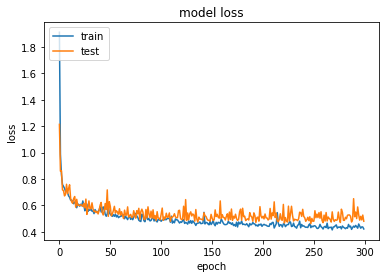

In [81]:

# Plot the History of Training Loss (history.history['loss']) and the Validation Loss (history.history['val_loss'])
# Title should be "Model Loss"
# x label: "Loss"
# y label: "Epoch"
# Legend: "Train" and "Validation"
# TODO
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

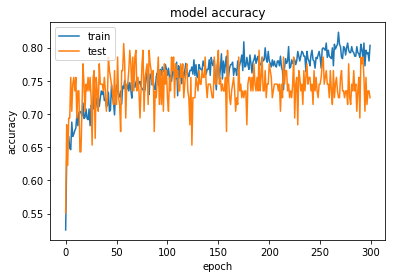

In [83]:
# Plot the History of Training Accuracy (history.history['acc']) and 
# the Validation Accuracy (history.history['val_loss'])
#
# Title should be "Model Accuracy"
# x label: "Accuracy"
# y label: "Epoch"
# Legend: "Train" and "Validation"
# TODO
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
# Evaluate the loss and accuracy on the test data
#loss, accuracy = 
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

	

In [85]:

print('Test score:', loss)
print('Test accuracy:', accuracy)

Test score: 0.6230095172750538
Test accuracy: 0.758620691710505
